In [2]:
import heartpy as hp
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal,stats
import logging
from tqdm import tqdm
import os
import glob

In [3]:
def plot_hist(test,p=(0.5,99.5),lines=True):
    plt.figure()
    median = np.median(test)
    avg = np.average(test)
    std = np.std(test)
    p0 = np.percentile(test, p[0])
    p1 = np.percentile(test, p[1])
    plt.hist(test,bins=100)
    if lines:
        plt.axvline(median,c='orange')
        plt.axvline(avg,c='red')
        plt.axvline(p0,c='black')
        plt.axvline(p1,c='black')
    plt.title(f"median:{median:.3f}, average:{avg:.3f}, std:{std:.3f},\n min:{np.nanmin(test):.3f}, max:{np.nanmax(test):.3f},\n{p[0]:2.1f}%: {p0:.3f}, {p[1]:2.1f}%:{p1:.3f}")

In [4]:
def concat_signals(root_dir,phase='train',abp=True):
    if phase == 'train':
        r = range(9)
    elif phase == 'validate':
        r = range(9,10)
    elif phase =='test':
        r = range(10,12)
    else:
        r = range(12)
    index = 0 if abp else 1
    sig_all = []
    for i in tqdm(r):
        files = glob.glob(os.path.join(root_dir,f"p0000{i:02d}","0000000_*.npy"))
        sigs = []
        for f in files:
            sigs.append(np.load(f)[index])
        sigs_cat = np.concatenate(sigs)
        sig_all.append(sigs_cat)
        print(f[-24:-17],sigs_cat.shape)
    sig_all = np.concatenate(sig_all)
    print('all shape:', sig_all.shape)
    return sig_all

In [5]:
def concat_signal_windows(root_dir,phase='train',abp=True,both=False):
    if phase == 'train':
        r = range(9)
    elif phase == 'validate':
        r = range(9,10)
    elif phase =='test':
        r = range(10,12)
    else:
        r = range(12)
    index = 0 if abp else 1

    sigs = []
    for i in tqdm(r):
        f = os.path.join(root_dir,f"p0000{i:02d}.npy")
        if both:
            a = np.load(f)
        else:
            a = np.load(f)[:,:,index]
        sigs.append(a)
        print(a.shape)
    sigs = np.concatenate(sigs)
    print('all shape:', sigs.shape,sigs.dtype)
    return sigs

In [33]:
def rand_plot(sig,index=None):
    plt.figure()
    if index is None:
        i = np.random.randint(len(sig))
        target = sig[i]
    else:
        i = index[np.random.randint(len(index))]
        target = sig[i]
    print("#",i,target.shape)
    plt.plot(target)
    return i

## ABP

#### 生シグナル

In [346]:
DATA_ROOT = r"../data/raw/BPDataset/p00"
sig = concat_signals(DATA_ROOT)
# test = np.load(os.path.join(DATA_ROOT,"p00000"+"0","0000000_"+"0001"+".npy"))

 11%|█         | 1/9 [00:00<00:02,  3.45it/s]

p000000 (32061000,)


 22%|██▏       | 2/9 [00:00<00:02,  3.43it/s]

p000001 (28048000,)


 33%|███▎      | 3/9 [00:00<00:01,  3.52it/s]

p000002 (22665000,)


 44%|████▍     | 4/9 [00:01<00:01,  3.44it/s]

p000003 (30679000,)


 56%|█████▌    | 5/9 [00:01<00:01,  3.33it/s]

p000004 (32723000,)


 67%|██████▋   | 6/9 [00:01<00:00,  3.27it/s]

p000005 (31944000,)
p000006 (15486000,)


 89%|████████▉ | 8/9 [00:02<00:00,  3.67it/s]

p000007 (24298000,)


100%|██████████| 9/9 [00:02<00:00,  3.50it/s]

p000008 (31294000,)


all shape: (249198000,) float64


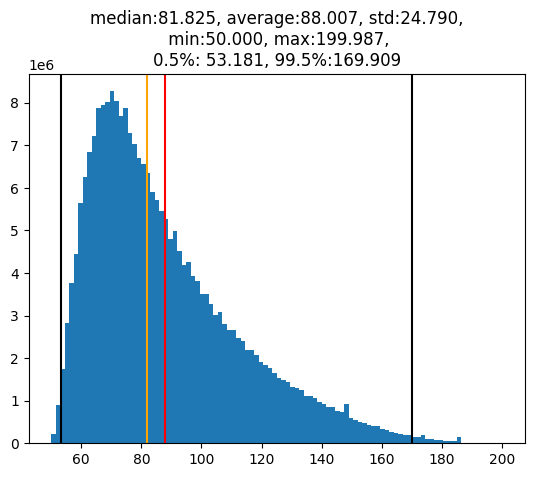

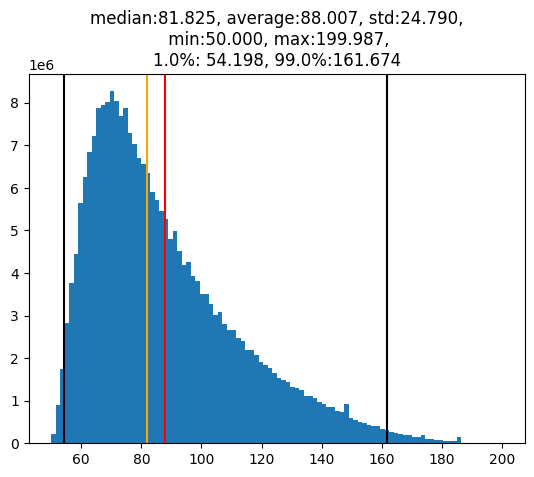

In [89]:
plot_hist(sig)
plt.figure()
plot_hist(sig,p=(1,99.0))

In [20]:
low = np.where(sig <53.181)[0]
high = np.where(sig>169.909)[0]
len(low),len(high)

(1238580, 1245607)

In [22]:
print(low[:10],low[-10:])
print(high[:10],high[-10:])

[ 23632  23633  81098 659135 659136 659137 659138 659139 659140 659141] [249166853 249166854 249166923 249186574 249186575 249186576 249186577
 249186578 249186579 249186580]
[1810102 1810103 1810104 1810105 1810180 1844307 1844469 1844470 1844471
 1844472] [249078281 249078282 249078283 249078284 249078285 249078286 249078287
 249078288 249078289 249078290]


In [25]:
low_neighbours = []
high_neighbours = []
prev = -500
for l in tqdm(low):
    if l-prev < 500:
        continue
    low_neighbours.append(sig[l-500:l+500])
    prev = l
prev = 0
for h in tqdm(high):
    if h-prev < 500:
        continue
    high_neighbours.append(sig[h-500:h+500])
    prev = h
low_neighbours = np.stack(low_neighbours)
high_neighbours = np.stack(high_neighbours)
low_neighbours.shape,high_neighbours.shape

100%|██████████| 1245607/1245607 [00:00<00:00, 5902998.16it/s]


((47901, 1000), (27760, 1000))

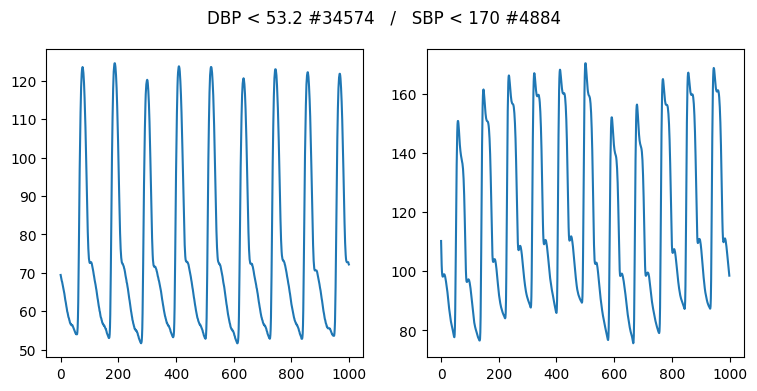

In [86]:
plt.figure(figsize=(9,4))
i =np.random.randint(low_neighbours.shape[0])
j = np.random.randint(high_neighbours.shape[0])
plt.subplot(121)
plt.suptitle("DBP < 53.2 #"+str(i)+"   /   SBP < 170 #"+str(j))
plt.plot(low_neighbours[i])
plt.subplot(122)
plt.plot(high_neighbours[j])


### すでにカットした波形で

In [355]:
DATA_ROOT = r"../data/processed/BP_npy/0118_256_raw/p00"
sig = concat_signal_windows(DATA_ROOT)

 22%|██▏       | 2/9 [00:00<00:01,  6.66it/s]

(124694, 256)
(108995, 256)


 44%|████▍     | 4/9 [00:00<00:00,  7.22it/s]

(87956, 256)
(119290, 256)


 67%|██████▋   | 6/9 [00:00<00:00,  6.72it/s]

(127278, 256)
(124252, 256)


 89%|████████▉ | 8/9 [00:01<00:00,  7.62it/s]

(59898, 256)
(94344, 256)


100%|██████████| 9/9 [00:01<00:00,  7.07it/s]


(121720, 256)
all shape: (968427, 256) float64


In [11]:
dbp = np.nanmin(sig,axis=1)
sbp = np.nanmax(sig,axis=1)
dbp.shape,sbp.shape

((968427,), (968427,))

In [42]:
np.where(dbp<5)

(array([], dtype=int64),)

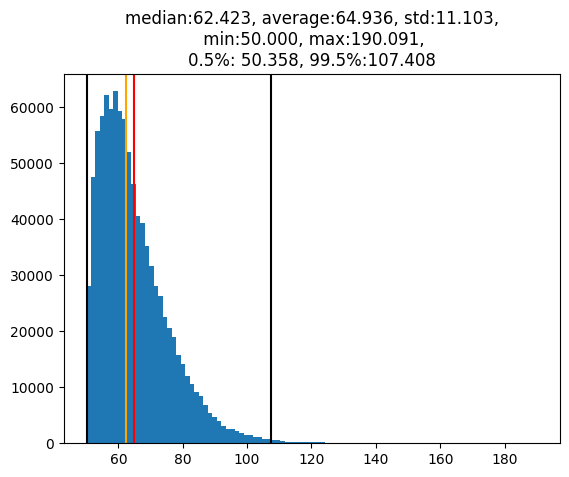

In [116]:
plot_hist(dbp)

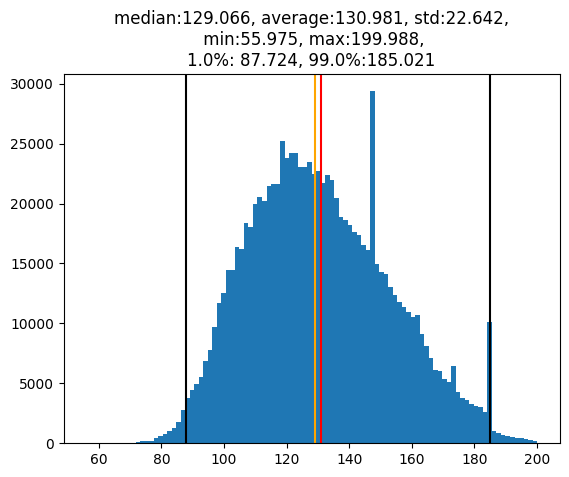

In [117]:
plot_hist(sbp,(1,99))

#### SBP の平らなピーク:119

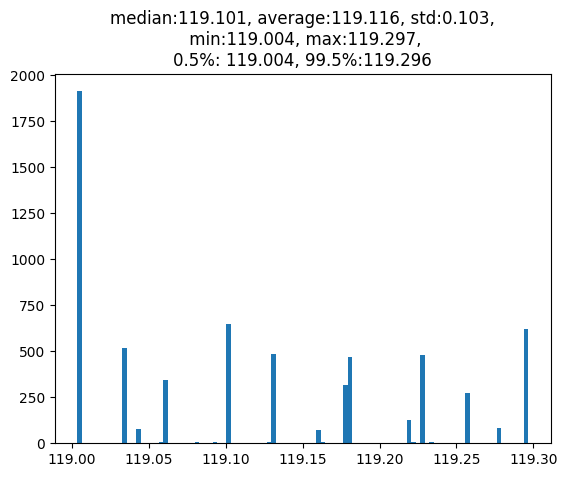

In [180]:
a = np.where((sbp>119) & (sbp<119.3))[0]
plot_hist(sbp[a],lines=False)

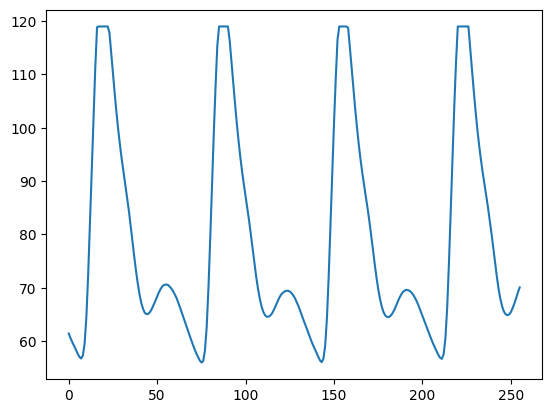

In [176]:
i = a[np.random.randint(len(a))] 
plt.plot(sig[i])

#### SBP の平らなピーク:148

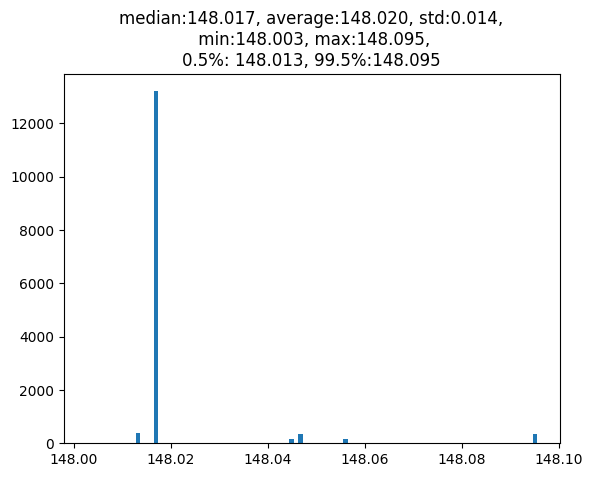

In [96]:
sbp2 = sbp[np.where((sbp>148) & (sbp<148.1))]
sbp2.shape
plot_hist(sbp2,lines=False)

In [ ]:
a = np.where((sbp>148) & (sbp<148.1))[0]
len(a),a

(14640,
 array([  1290,   1317,   1430, ..., 966468, 967236, 967309], dtype=int64))

In [1]:
i = a[np.random.randint(len(a))] 
plt.plot(sig[i])

NameError: name 'a' is not defined

#### SBP の平らなピーク:173

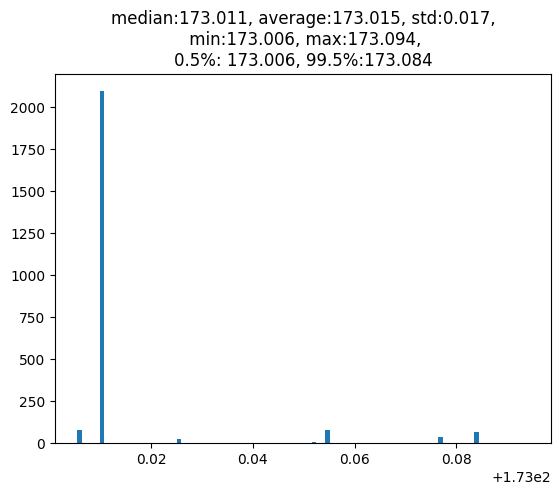

In [112]:
sbp2 = sbp[np.where((sbp>173) & (sbp<173.1))]
sbp2.shape
plot_hist(sbp2,lines=False)

In [113]:
a = np.where((sbp>173) & (sbp<173.1))[0]
len(a),a

(2393,
 array([  7175,   7440,   9651, ..., 867294, 869651, 953358], dtype=int64))

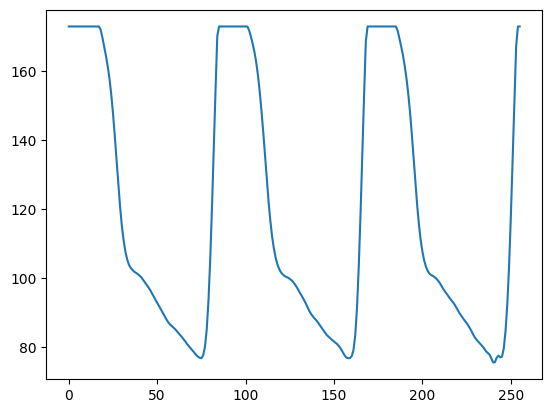

In [115]:
i = a[np.random.randint(len(a))] 
plt.plot(sig[i])

#### SBP の平らなピーク:185

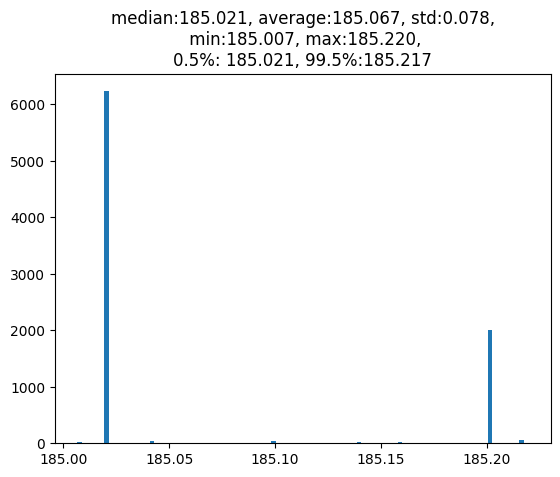

In [97]:
sbp2 = sbp[np.where((sbp>185) & (sbp<185.22))]
sbp2.shape
plot_hist(sbp2,lines=False)

In [72]:
a = np.where((sbp>185.0) & (sbp<185.21))[0]
len(a),a

(8393,
 array([  8862,   8864,   8886, ..., 966654, 966656, 967222], dtype=int64))

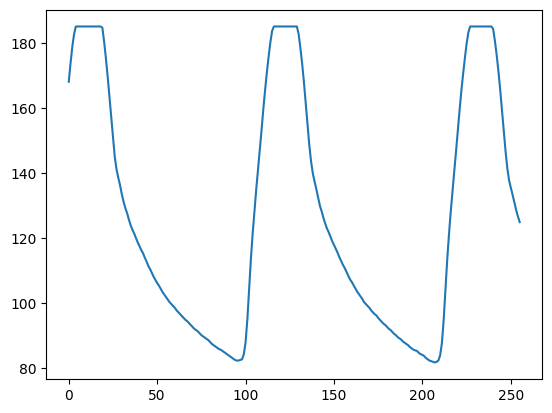

In [90]:
i = a[np.random.randint(len(a))] 
plt.plot(sig[i])

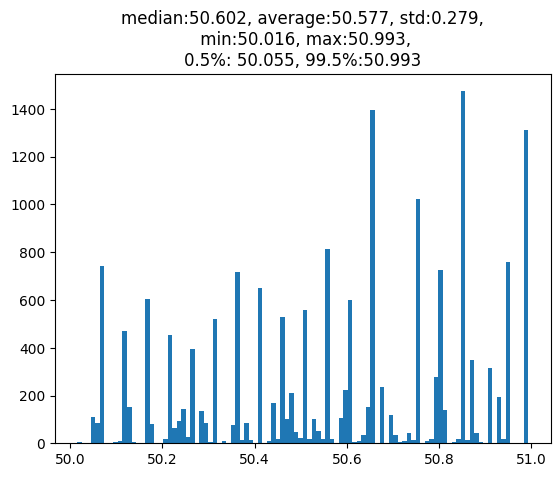

In [418]:
dbp2 = dbp[np.where((dbp>50) & (dbp<51))]
dbp2.shape
plot_hist(dbp2,lines=False)

In [10]:
mask = np.where(~((sbp>148) & (sbp<148.1)) & ~((sbp>185.0) & (sbp<185.21)) &  ~((sbp>173) & (sbp<173.1)))[0]

sbp3 = sbp[mask]
print(sbp3.shape)
plot_hist(sbp3)

NameError: name 'sbp' is not defined

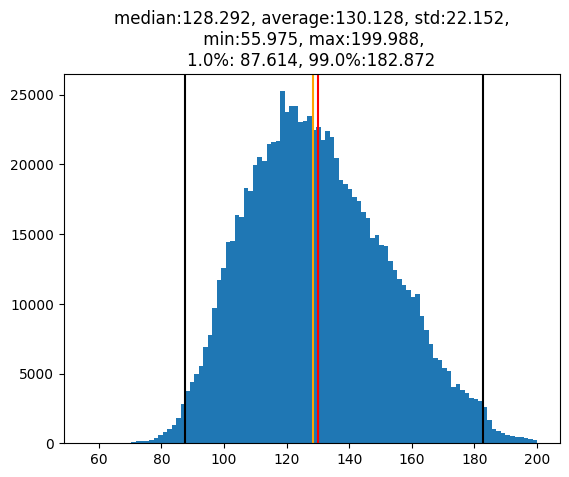

In [135]:
plot_hist(sbp3,(1,99))

### final code

In [359]:
dbp_final = np.where(dbp>105)[0]
sbp_final = np.where((sbp < 85) | (sbp >180))[0]
mask1 = np.where(((sbp>148) & (sbp<148.1)) | ((sbp>185.0) & (sbp<185.21)) |  ((sbp>173) & (sbp<173.1)) | ((sbp>119.0) & (sbp<119.1)))[0]

mask_flat =  np.full(len(sbp), True)
mask_flat[mask1] = False
mask_dbp = np.full(len(sbp), True)
mask_dbp[dbp_final] = False

mask_sbp = np.full(len(sbp), True)
mask_sbp[sbp_final] = False
mask_abp = mask_dbp & mask_sbp & mask_flat
sig2 = sig[mask_abp]
print("dbp removal:",len(dbp_final),", sbp removal:",len(sbp_final),", flat removal",len(mask1), ", final shape:",sig.shape,"->",sig2.shape)

dbp removal: 6037 , sbp removal: 29239 , flat removal 28309 , final shape: (968427, 256) -> (914585, 256)


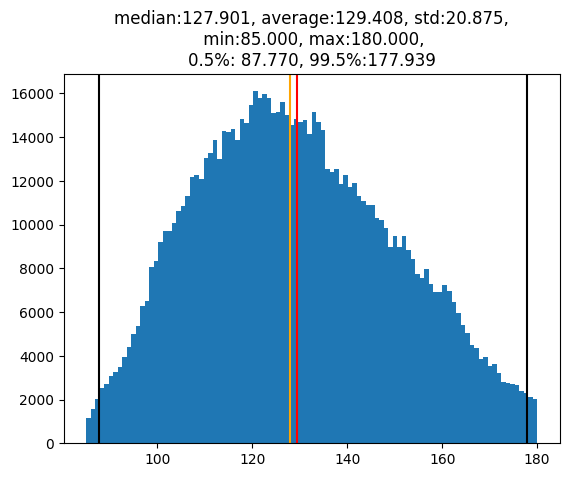

In [174]:
plot_hist(np.nanmax(sig2,axis=1))


## PPG

### load

In [7]:
DATA_ROOT = r"../data/processed/BP_npy/0118_256_raw/p00"
sig = concat_signal_windows(DATA_ROOT,phase='train',abp=False)

 11%|█         | 1/9 [00:00<00:04,  1.64it/s]

(124694, 256)


 22%|██▏       | 2/9 [00:01<00:03,  1.83it/s]

(108995, 256)


 33%|███▎      | 3/9 [00:01<00:02,  2.13it/s]

(87956, 256)


 44%|████▍     | 4/9 [00:02<00:02,  2.02it/s]

(119290, 256)


 56%|█████▌    | 5/9 [00:02<00:02,  1.78it/s]

(127278, 256)


 67%|██████▋   | 6/9 [00:03<00:01,  1.82it/s]

(124252, 256)


 78%|███████▊  | 7/9 [00:03<00:00,  2.19it/s]

(59898, 256)


 89%|████████▉ | 8/9 [00:03<00:00,  2.17it/s]

(94344, 256)


100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

(121720, 256)


all shape: (968427, 256) float64


In [8]:
min = np.nanmin(sig,axis=1)
max = np.nanmax(sig,axis=1)

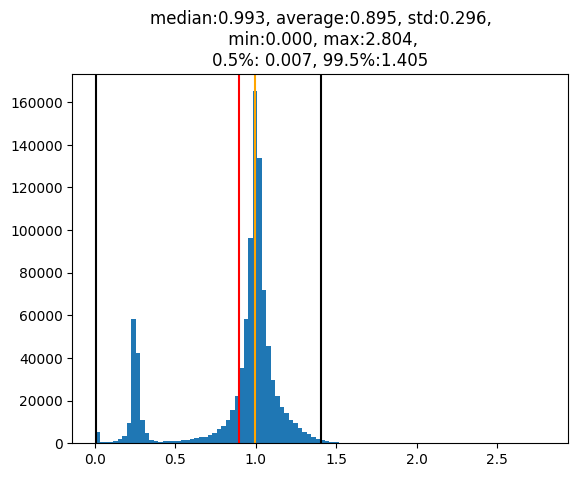

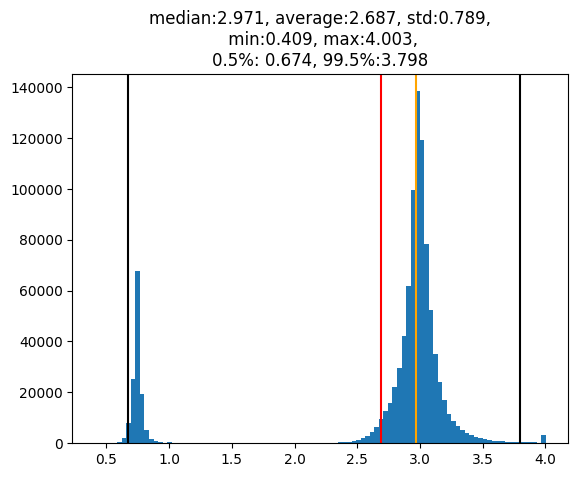

In [196]:
plot_hist(min)
plot_hist(max)

### 最大値が1で測定された(small)か,4で測定されたか(big)

In [11]:
small_ppg = np.where((sig <= 1).all(axis=1))[0]
big_ppg = np.where((sig > 1).any(axis=1))[0]
small_ppg.shape,big_ppg.shape

((132610,), (835817,))

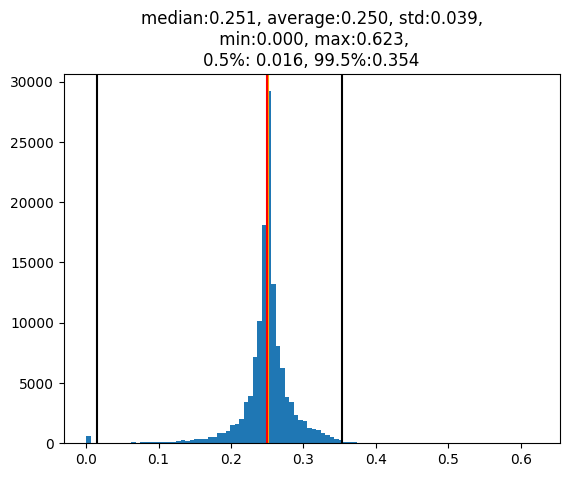

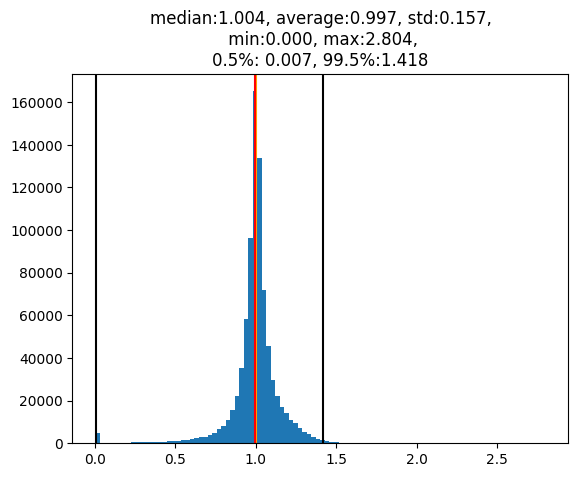

In [200]:
plot_hist(min[small_ppg])
plot_hist(min[big_ppg])

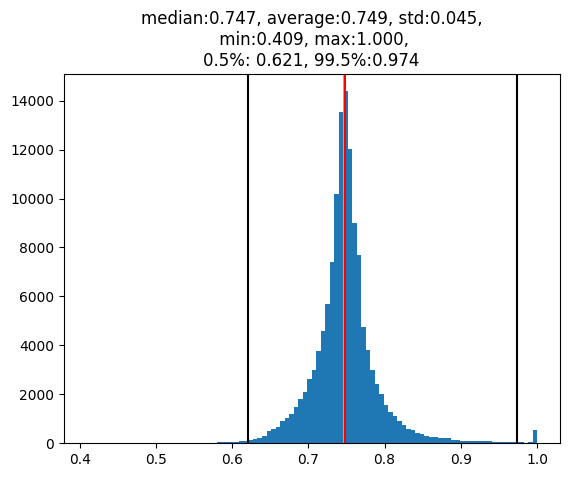

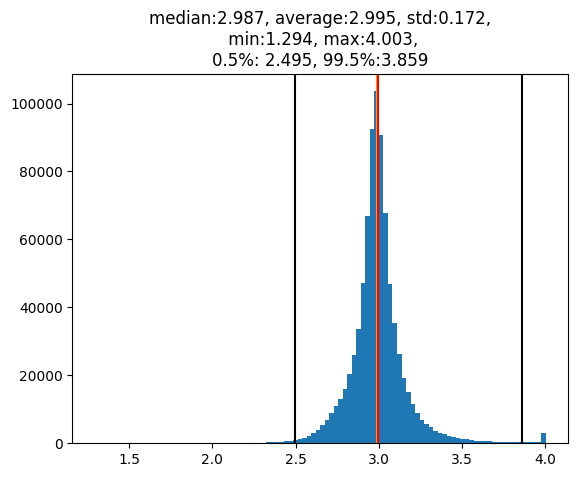

In [201]:
plot_hist(max[small_ppg])
plot_hist(max[big_ppg])

### 平らなピーク(ppg)


In [275]:
smin = min[small_ppg]
bmin = min[big_ppg]
smax = max[small_ppg]
bmax = max[big_ppg]

#### min==0

(643,)


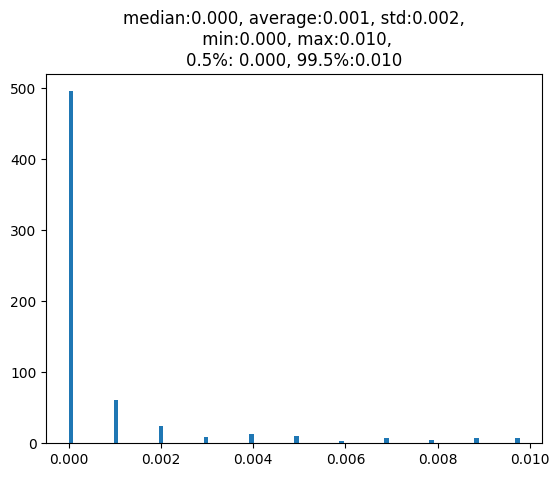

In [243]:

smin1 = np.where(smin<0.01)[0]
print(smin1.shape)
plot_hist(smin[smin1],lines=False)

# 122127 (256,)


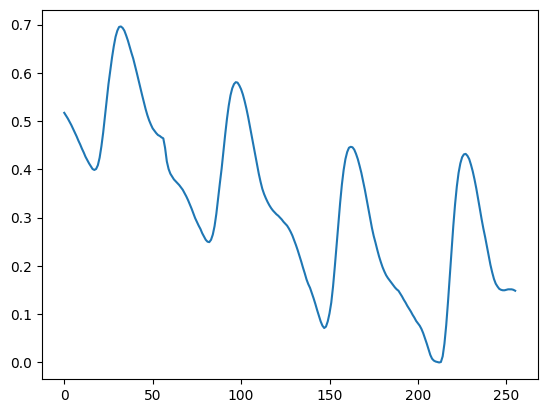

In [274]:
rand_plot(sig[small_ppg],index=smin1)

(4309,)


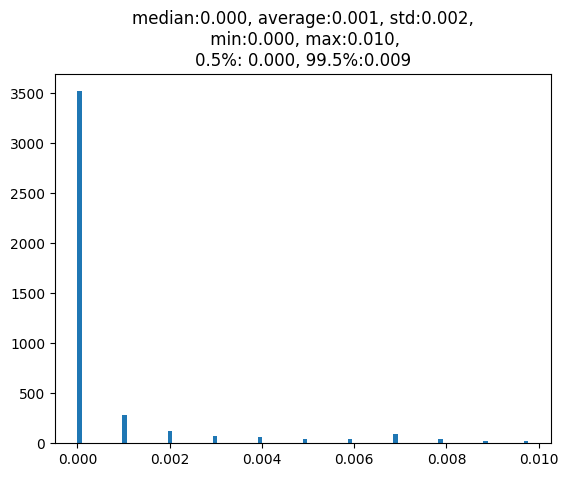

In [327]:
bmin1 = np.where(bmin<0.01)[0]
print(bmin1.shape)
plot_hist(bmin[bmin1],lines=False)

# 302640 (256,)


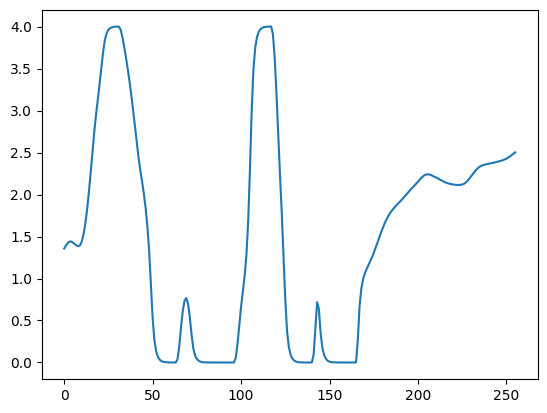

In [332]:
rand_plot(sig[big_ppg],index=bmin1)

#### max==1


(149,)


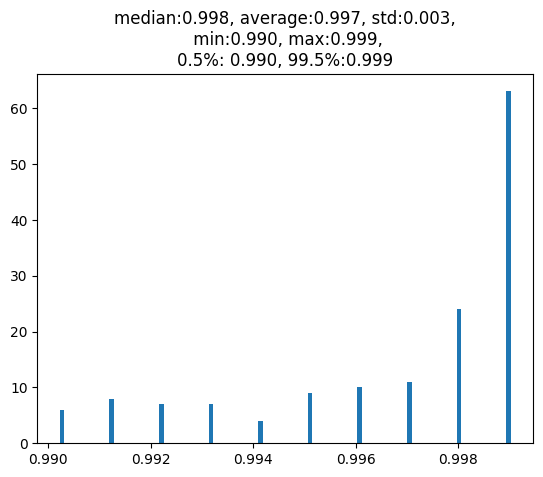

In [326]:
smax1 = np.where(smax>0.99)[0]
# smax1 = np.where((smax>0.99)&(smax<1))[0]
print(smax1.shape)
plot_hist(smax[smax1],lines=False)

# 98020 (256,)


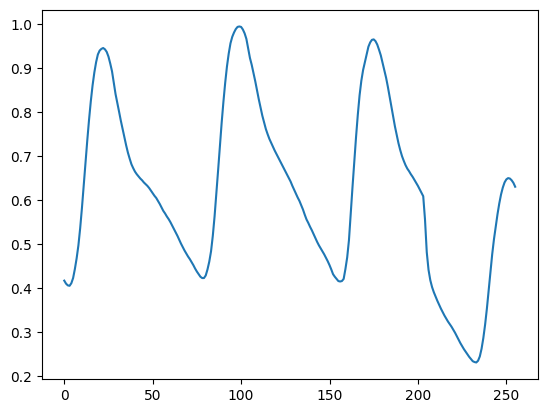

In [325]:
rand_plot(sig[small_ppg],index=smax1)

#### max==4

(2902,)


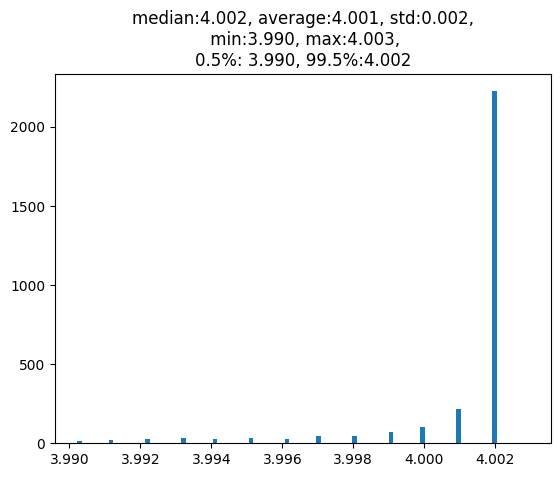

In [333]:
bmax1 = np.where(bmax>3.99)[0]
# smax1 = np.where((smax>0.99)&(smax<1))[0]
print(bmax1.shape)
plot_hist(bmax[bmax1],lines=False)

# 535751 (256,)


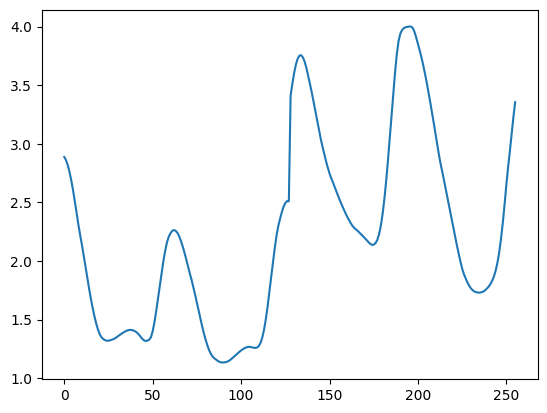

In [343]:
rand_plot(sig[big_ppg],index=bmax1)

### final code

In [12]:
flat_small = np.where(((sig <= 1).all(axis=1)) &((min<0.01) | (max > 0.99)))[0]
flat_big = np.where(((sig > 1).any(axis=1)) &((min<0.01) | (max > 3.99)))[0]
mask_small =  np.full(len(sig), True)
mask_big =  np.full(len(sig), True)
mask_small[flat_small] = False
mask_big[flat_big] = False
mask_ppg = mask_small & mask_big
sig2 =sig[mask_ppg]
print("small flat:",len(flat_small),", big flat:",len(flat_big),", final shape:",sig.shape,"->",sig2.shape)

small flat: 1086 , big flat: 6407 , final shape: (968427, 256) -> (960934, 256)


### 最大値、最小値のヒストグラム（処理後）

最大値4（big）は4で割って一緒に処理

In [14]:
sig3 = sig.copy()
sig3[big_ppg] = sig3[big_ppg]/4
sig3 = sig3[mask_ppg]
min_sig3 = np.nanmin(sig3,axis=1)
max_sig3 = np.nanmax(sig3,axis=1)
plot_hist(min_sig3,(1,99))
plot_hist(max_sig3,(1,99))

NameError: name 'big_ppg' is not defined

In [12]:
a=np.where(max_sig3>0.91)[0]
print(a.shape)
rand_plot(sig3,a)

NameError: name 'max_sig3' is not defined

### 片方が外れ値の時、もう片方の波形or分布は？


In [406]:
DATA_ROOT = r"../data/processed/BP_npy/0118_256_raw/p00"
sig = concat_signal_windows(DATA_ROOT,phase='train',both=True)

 22%|██▏       | 2/9 [00:00<00:01,  7.00it/s]

(124694, 256, 2)
(108995, 256, 2)


 44%|████▍     | 4/9 [00:00<00:00,  7.31it/s]

(87956, 256, 2)
(119290, 256, 2)


 67%|██████▋   | 6/9 [00:00<00:00,  6.60it/s]

(127278, 256, 2)
(124252, 256, 2)


 89%|████████▉ | 8/9 [00:01<00:00,  7.65it/s]

(59898, 256, 2)
(94344, 256, 2)


100%|██████████| 9/9 [00:01<00:00,  7.14it/s]


(121720, 256, 2)
all shape: (968427, 256, 2) float64


In [407]:
sig[big_ppg,:,1] = sig[big_ppg,:,1]/4

In [421]:
mask = mask_abp & mask_ppg
sig = sig[mask]
sig.shape

(907864, 256, 2)

In [422]:
abp_min = np.nanmin(sig[:,:,0],axis=1)
abp_max = np.nanmax(sig[:,:,0],axis=1)
ppg_min = np.nanmin(sig[:,:,1],axis=1)
ppg_max = np.nanmax(sig[:,:,1],axis=1)

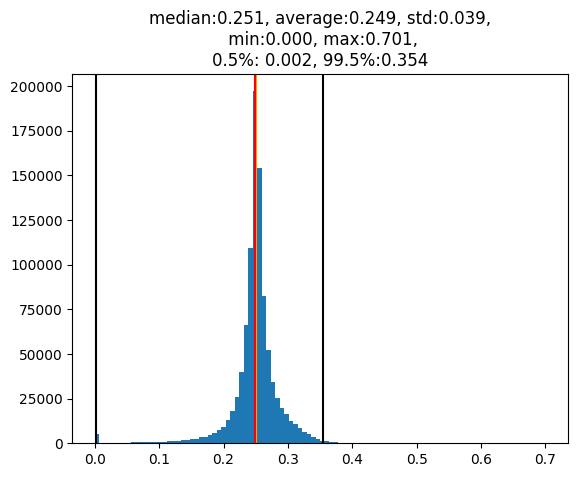

In [411]:
plot_hist(ppg_min)

In [423]:
a = np.where(ppg_min<0.125)[0]
ab = np.where((ppg_min >0.01)&(ppg_min<0.125))[0]

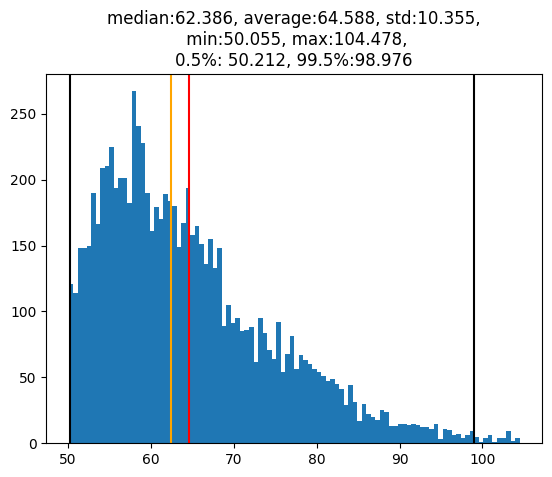

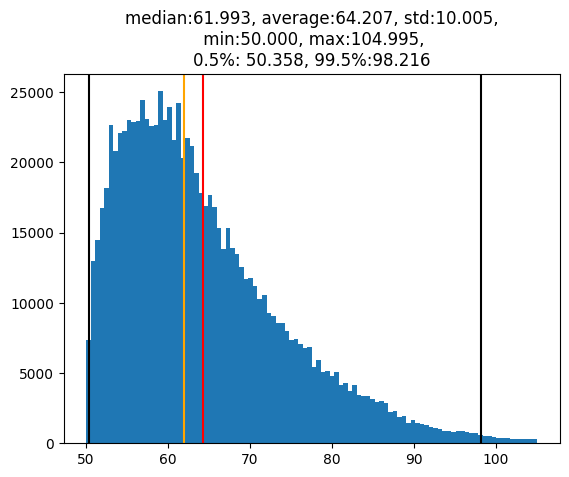

In [424]:
plot_hist(abp_min[ab])
plot_hist(abp_min)


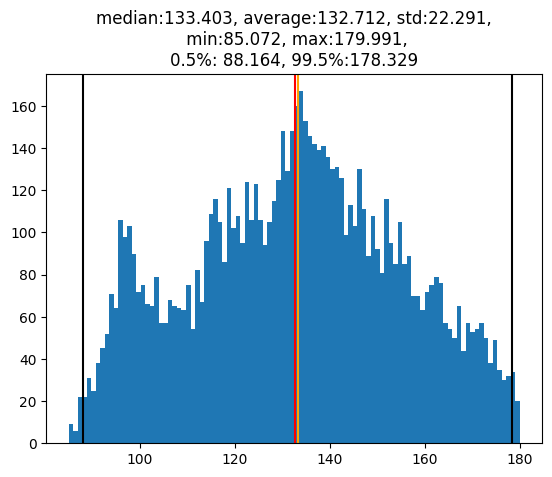

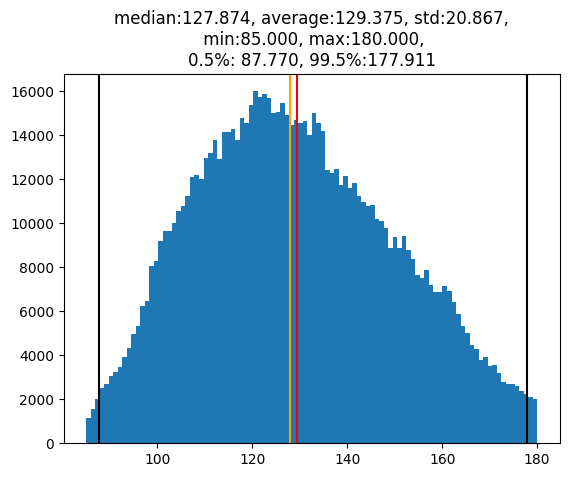

In [425]:
plot_hist(abp_max[ab])
plot_hist(abp_max)

In [426]:
a = np.where(ppg_max>0.88)[0]
ab = np.where((ppg_max >0.88)&(ppg_max<0.995))[0]

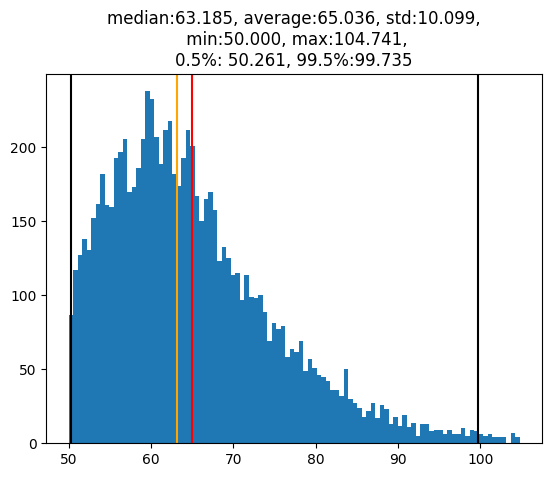

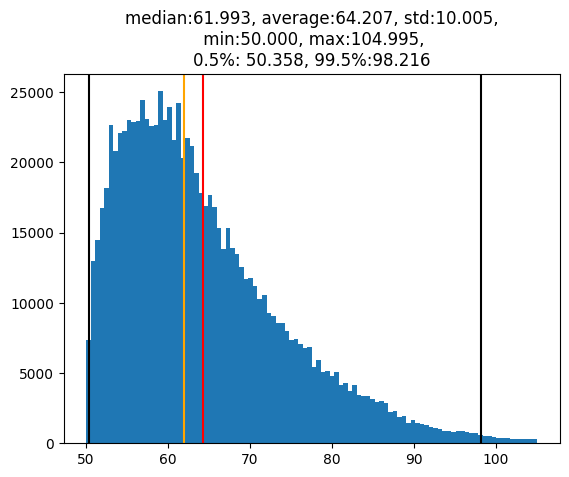

In [427]:
plot_hist(abp_min[ab])
plot_hist(abp_min)

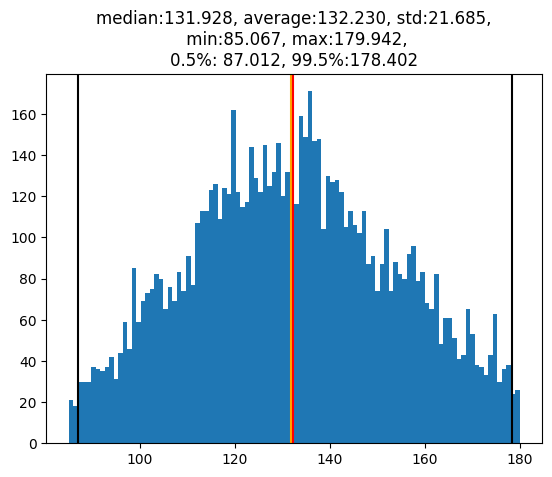

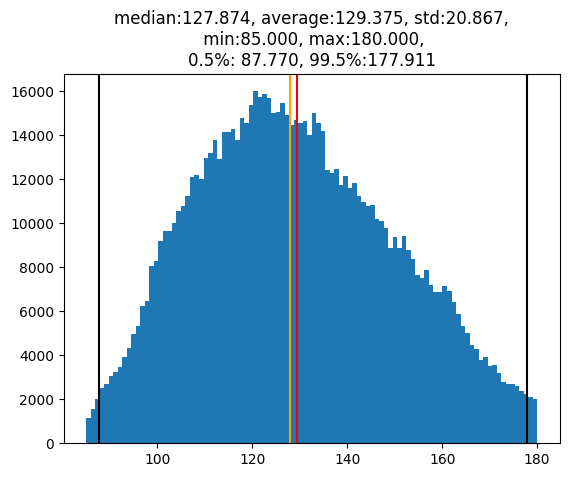

In [428]:
plot_hist(abp_max[ab])
plot_hist(abp_max)

In [452]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chisquare, shapiro, norm
from sklearn.preprocessing import minmax_scale, scale, robust_scale

In [457]:
data = min_sig3


In [456]:
fig = plt.subplots(figsize=(8,8))
 
stats.probplot(data, dist="norm", plot=plt)
plt.show()

KeyboardInterrupt: 

In [451]:
hist_data, _ = np.histogram(data, bins="auto")
# オムニバス検定の実行
k2, omnibus_p_value = stats.normaltest(data)
print(f'Omnibus test statistic: {k2}, p-value: {omnibus_p_value}')
# 一様性検定（カイ２乗検定）
_, chisquare_p = chisquare(hist_data)
print("一様性検定（カイ２乗検定）のp値 : {}".format(chisquare_p))

# 正規性検定（シャピロ–ウィルク検定）
_, shapiro_p = shapiro(data)
print("正規性検定（シャピロ–ウィルク検定）のp値 : {}".format(shapiro_p))


Omnibus test statistic: 282889.2972049236, p-value: 0.0
一様性検定（カイ２乗検定）のp値 : 0.0
正規性検定（シャピロ–ウィルク検定）のp値 : 0.0


f:\minowa\BloodPressureEstimation\.venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [458]:

stats.kstest(data, "norm")

KstestResult(statistic=0.5439622851288846, pvalue=0.0, statistic_location=0.15933528836754643, statistic_sign=-1)

In [462]:
print(sig3.shape)

(960934, 256)


In [464]:
from sklearn.preprocessing import RobustScaler
shape_old = sig3.shape
scaler = RobustScaler()
sig4 = scaler.fit_transform(sig3.reshape(-1,1))
sig4 = sig4.reshape(shape_old)

In [465]:
sig4.shape

(960934, 256)

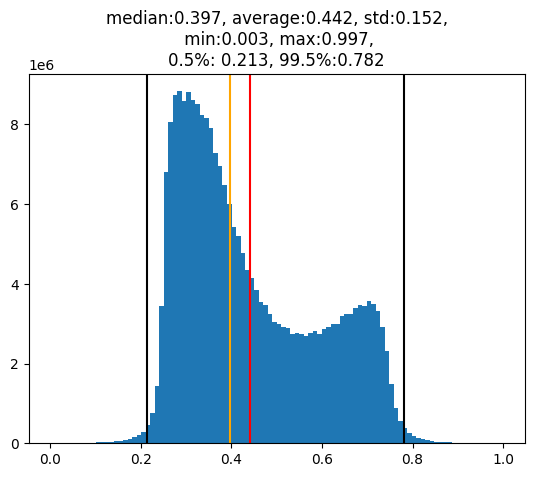

In [471]:
plot_hist(sig3.flatten())

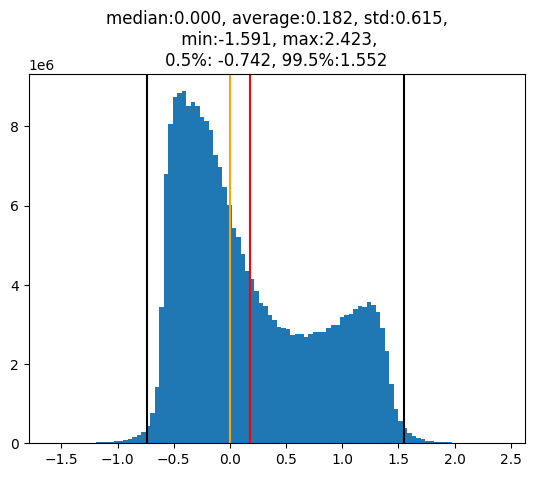

In [472]:
plot_hist(sig4.flatten())

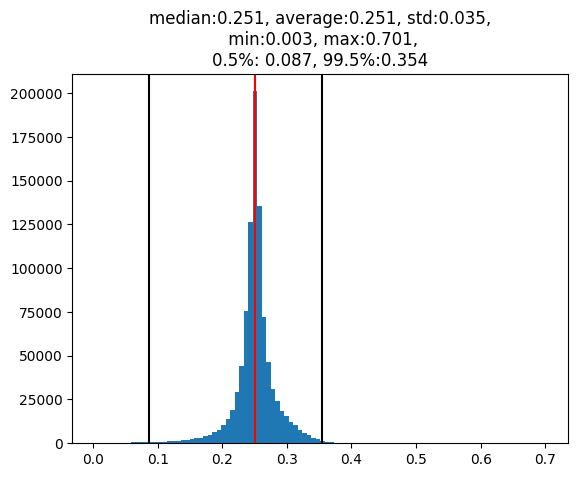

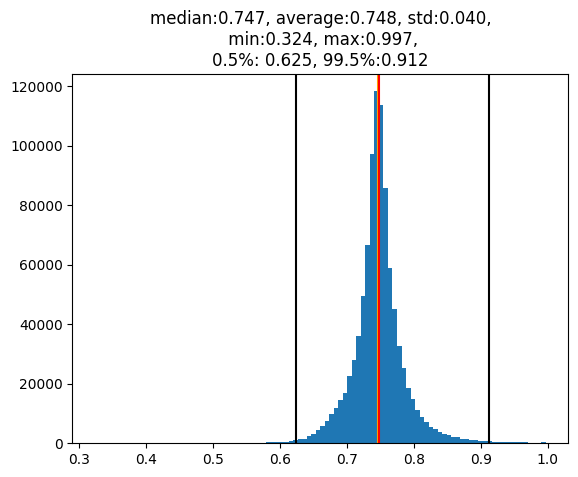

In [469]:
ppg_min = np.nanmin(sig3,axis=1)
ppg_max = np.nanmax(sig3,axis=1)
plot_hist(ppg_min)
plot_hist(ppg_max)

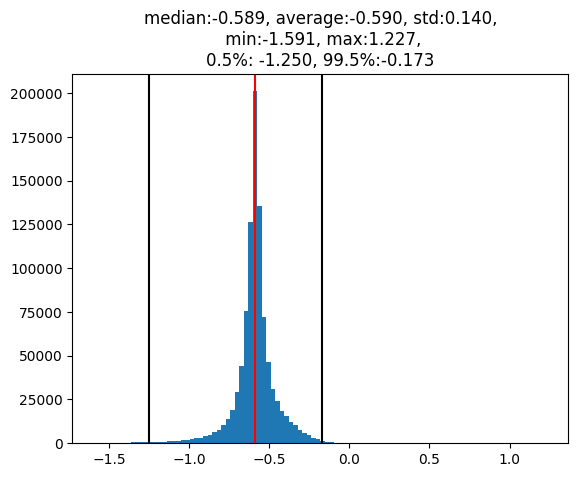

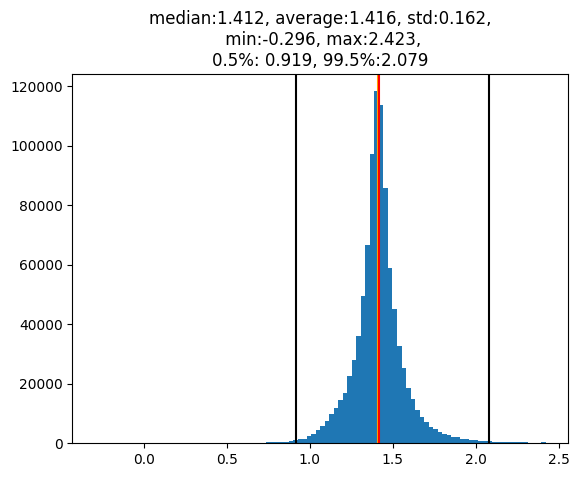

In [470]:
ppg_min = np.nanmin(sig4,axis=1)
ppg_max = np.nanmax(sig4,axis=1)
plot_hist(ppg_min)
plot_hist(ppg_max)

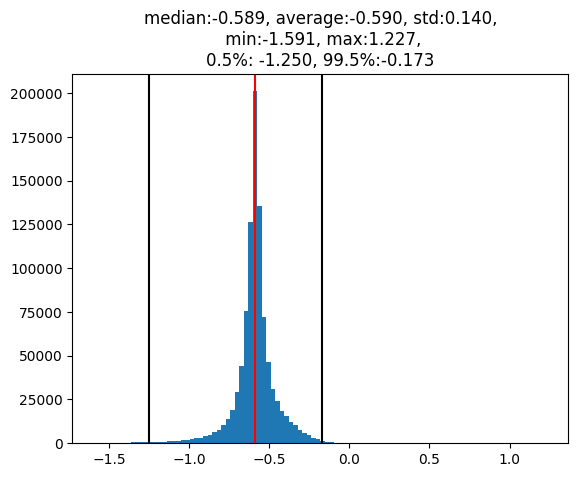

In [467]:
plot_hist(ppg_min)

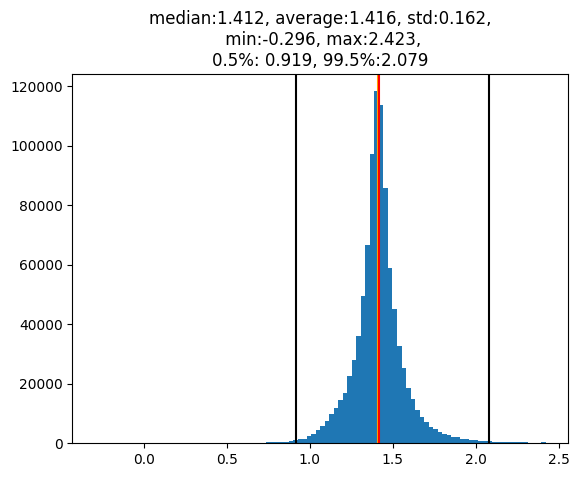

In [468]:
plot_hist(ppg_max)

### Skewnessでの判定
[Elgendi M, Optimal Signal Quality Index for Photoplethysmogram Signals](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5597264/)  
256pt(2sが理想)で計算  
Skewness > 0 : OK  
Skewness < 0 : NG 

In [15]:
Ssqi = stats.skew(sig3,axis=1)
print(Ssqi.shape)

(968427,)


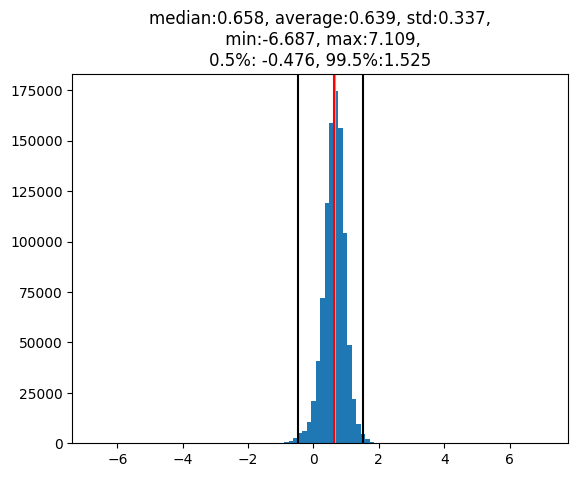

In [15]:
plot_hist(Ssqi)

In [23]:
len(Ssqi[Ssqi<0]),len(Ssqi)

(34681, 960934)

In [16]:
sig5 = sig3[Ssqi<0]


In [24]:
sig5.shape

(926253, 256)

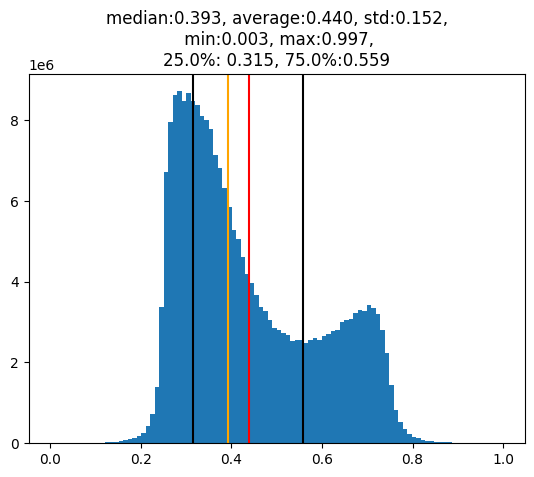

In [27]:

plot_hist(sig5.flatten(),(25,75))

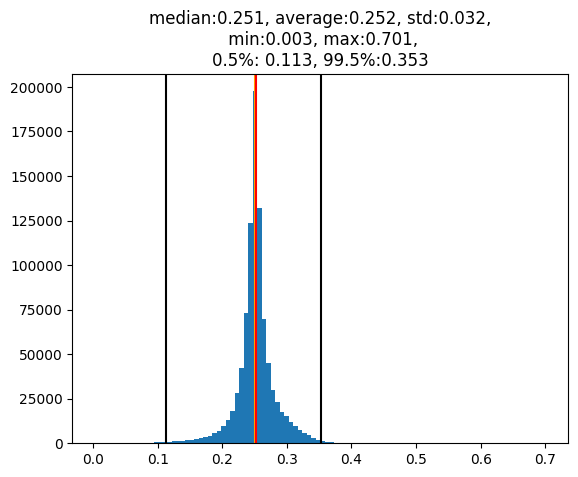

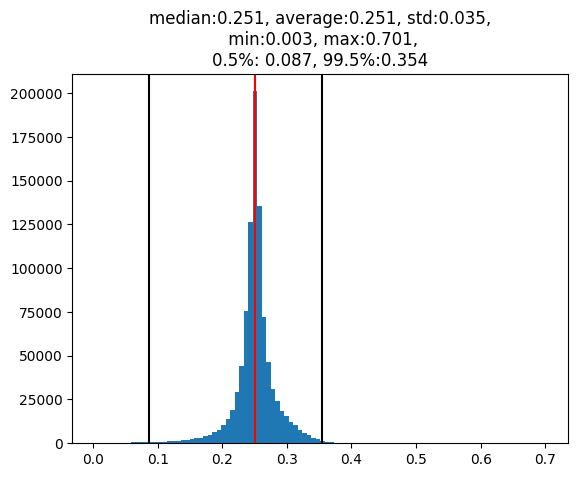

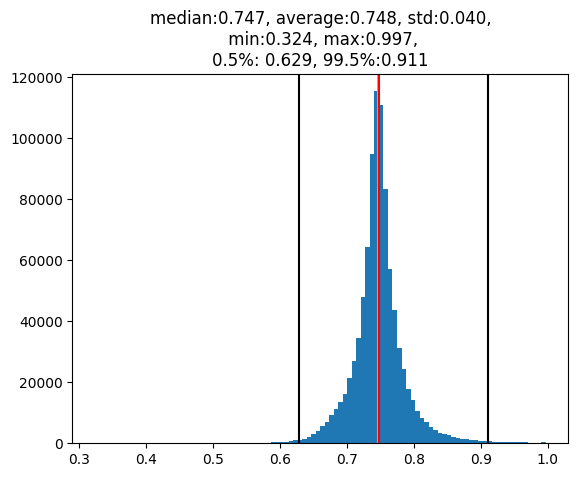

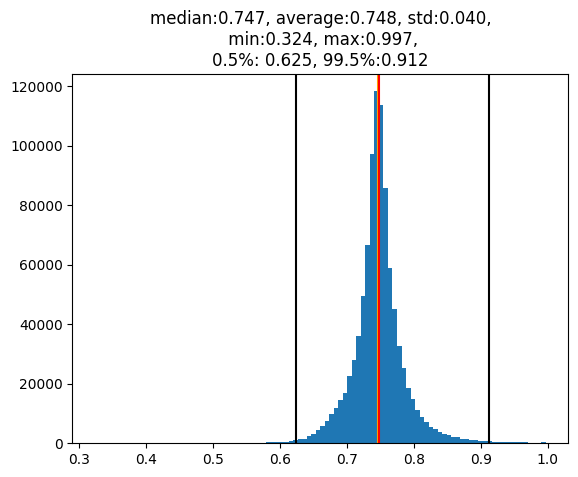

In [26]:
ppg_min5 = np.nanmin(sig5,axis=1)
ppg_max5 = np.nanmax(sig5,axis=1)
ppg_min3 = np.nanmin(sig3,axis=1)
ppg_max3 = np.nanmax(sig3,axis=1)
plot_hist(ppg_min5)
plot_hist(ppg_min3)
plot_hist(ppg_max5)
plot_hist(ppg_max3)

# 29116 (256,)
29116


-0.19953586115848104

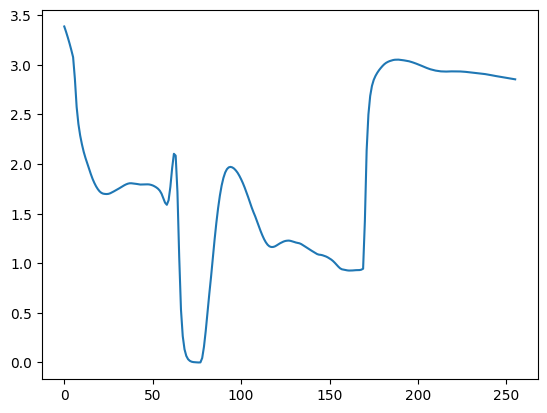

In [57]:
a = rand_plot(sig5)
print(a)
Ssqi = stats.skew(sig5[a])
Ssqi

1. raw
2. filter 
3. ppg normalize(max4->1)
4. windowing
5. remove anomaly abp & flat ppg/abp
6. ppg removal by skewness
7. ppg min-max normalization
8. abp min-max normalization